# Preprocessing from package

## Imports packages and sample .txt

Checking virtualenv with `pyenv`

In [1]:
#!pyenv virtualenvs

Importing necessary packages

In [56]:
#!pip install nltk

  Using cached nltk-3.5.zip (1.4 MB)
     |████████████████████████████████| 284 kB 6.2 MB/s eta 0:00:01
Using legacy 'setup.py install' for nltk, since package 'wheel' is not installed.
    Running setup.py install for nltk ... done


In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

Select the data_samples to read .txt files

In [3]:
#run only once, multiple runs will give an error =>restart kernel
print(os.getcwd())
os.chdir(os.path.join('..', 'IIPE', 'data_sample', 'plain_text_sample'))
os.getcwd()

/Users/alexisgourdol/code/alexisgourdol/IIPE-data/notebooks


'/Users/alexisgourdol/code/alexisgourdol/IIPE-data/IIPE/data_sample/plain_text_sample'

In [18]:
file_names = os.listdir()
file_names

['Reports_Plain text_03220F_15_11_2019.txt',
 'Reports_Plain text_01300Q_08_10_2020.txt',
 'Reports_Plain text_03917V_23_09_2020.txt',
 'Reports_Plain text_05933G_08_10_2020.txt',
 'Reports_Plain text_07518E_15_12_2020.txt']

## Clean file names

Clean file names, return ref and date YYYY-MM-DD format

In [6]:
def clean_file_names(lst):
    """returns a list of tuples<reference, date>"""
    cleaned = [name.replace('Reports_Plain text_','').replace('.txt','') for name in os.listdir()]
    splitted = [name.split('_') for name in cleaned]
    references = [lst[0] for lst in splitted]
    dates = ['-'.join(name[1:][::-1]) for name in splitted]
    return [(r,d) for r, d in zip(references, dates)]


In [7]:
clean_file_names(os.listdir())

[('03220F', '2019-11-15'),
 ('01300Q', '2020-10-08'),
 ('03917V', '2020-09-23'),
 ('05933G', '2020-10-08'),
 ('07518E', '2020-12-15')]

## Cleaning unusefull content

Read `.txt`files into a pandas.Dataframe

In [66]:
def make_contents_df(lst):
    """Returns a dataframe with date, reference, text from a list of file_names"""
    #init a list of dictionnaries
    ld_contents = []
    
    for file in file_names:
        # keeping the reference and the date
        split = file.replace('Reports_Plain text_','').replace('.txt','').split('_')
        reference = split[0]
        date= '-'.join(split[1:][::-1])

        #creating the dictionnary
        d = {'date':date,
             'reference':reference,
             'text': '' }

        #adding text content to the dictionary
        with open(file) as f:
            text = f.read()
            d['text']=text
        ld_contents.append(d)
    #create dataframe and set date to a datetime datatype

    df_contents = pd.DataFrame(ld_contents)
    df_contents['date'] = pd.to_datetime(df_contents['date'])
    return df_contents

In [68]:
df_FilesProperlyConverted = make_contents_df(file_names)
df_FilesProperlyConverted

,date,reference,text
0,2019-11-15,03220F,"Whole-School Evaluation – Management, Leadersh..."
1,2020-10-08,01300Q,"Whole-School Evaluation – Management, Leadersh..."
2,2020-09-23,03917V,"Whole-School Evaluation – Management, Leadersh..."
3,2020-10-08,05933G,"Whole-School Evaluation – Management, Leadersh..."
4,2020-12-15,07518E,"Whole-School Evaluation – Management, Leadersh..."


### Most used words


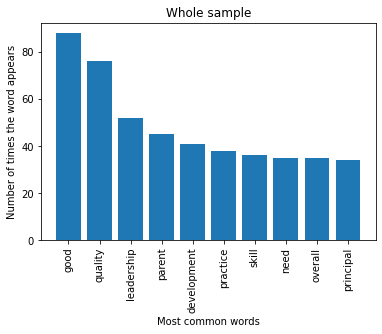

In [87]:
stopwords = set(nltk.corpus.stopwords.words('english'))

TotalText = []
for index, row in df_FilesProperlyConverted.iterrows():
    text = row['text']
    TotalText.append(text)
newStopWords = ['school','learning','student','pupil','teacher','management','teaching','support', 'lesson', 'board']
newStopWords_plur = ['schools','learnings','students','pupils','teachers','managements','teachings','supports', 'lessons', 'boards']
newStopWords += newStopWords_plur
stopwords = stopwords.union(newStopWords)
TotalText = " ".join(TotalText)
tokens = [w for w in word_tokenize(TotalText.lower()) if w.isalpha()]          # isalpha() checks if each word is alphabetical, lower() transforms everything to lowercase
no_stop = [t.strip() for t in tokens if t.strip() not in stopwords]      # stopwords already comes with a built-in list of words to remove
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stop]
bow = Counter(lemmatized)
MostCommon = dict(bow.most_common(10))

plt.bar(*zip(*MostCommon.items()))
plt.title('Whole sample')
plt.xlabel('Most common words')
plt.ylabel('Number of times the word appears')
plt.xticks(rotation='vertical')
plt.savefig("Results\\Word count\\Whole sample.png")
plt.show()

## Topic modelling